# Homework 4
# Perceptron, SVM, and PCA

# <p style="text-align: right;"> &#9989; Yashika Desai.</p>
# <p style="text-align: right;"> &#9989; yashikaadesai</p>

# Goal for this homework assignment
We have worked some basics on perceptron, SVM, and PCA in the pre-class and in-class assignments. In this homework assignment, we will:

* Continue to use git as the version control tool
* Work on unfamiliar data
* Use perceptron to classify data 
* Use SVM to classify data
* Use principal component analysis to facilitate classification


**This assignment is due by 11:59 pm on Friday, April 25th. Note that ONLY the copy on GITHUB will be graded.**  **There are 60 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.

---
# Part 1: Git repository (6 points)

You're going to add this assignment to the `cmse202-s25-turnin` repository you previously created. The history of progress on the assignment will be tracked via git commitments. 

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-04`

2. Move this notebook into that **new directory** in your repository. 

5. Double check to make sure your file is at the correct directory.

6. Once you're certain that file and directory are correct, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw04` to push your file to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font>  git clone https://github.com/yashikaadesai/CMSE202-S25-turnin.git

**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-04` directory that you just created.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.

---
# Part 2: Deal with unfamiliar data (35 points)

## Warm up with perceptron for binary classification
## 2.1 Load up the dataset

This data is obtained from Kaggle/diabetes. It contains multiple measured values and a label for whether the patient is diagnosed as diabetic. 

* Use commands to dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv`
* Use Pandas to load in the data and briefly examine it.
* Succeed data load-up gets **2 pt**. 

In [1]:
!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/diabetes_prediction_dataset.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3721k  100 3721k    0     0  4635k      0 --:--:-- --:--:-- --:--:-- 4639k


In [2]:
# put your code here
import pandas as pd

df = pd.read_csv("diabetes_prediction_dataset.csv")
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
# Check shape and column names
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.info()
df.describe()


Shape: (100000, 9)
Columns: ['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


How many patients are in this dataset? What are features of the patients?

<font size=6 color="#009600">&#9998;</font> 
- There are 100,000 patients in this dataset
- gender,age,hypertension,heat disease,smoking history,bmi,blood glucose level,diabetes and HbA1c_level

### Use your perceptron class built in Day18 and Day19 assignments to classify whether patients are diabetic.

* You should see that there are some features that are non-numerics.
* The first one is `gender`. Find the types of classes and convert them to numerics in your dataframe.
* The second one is `smoking_history`, convert those string labels to numerics.
* Note that since perceptron is a binary classifier, which only determines which side of the dividing line the data points reside, we should also convert the labels to `+1` and `-1`.
* Completing data conversion gets **5 pt**.

In [4]:
import pandas as pd

df['gender'] = df['gender'].map({'Female': 0, 'Male': 1, 'Other': 2})
df['smoking_history'] = df['smoking_history'].astype('category').cat.codes
#Convert diabetes column to +1 and -1
df['diabetes'] = df['diabetes'].map({0: -1, 1: 1})
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,-1
1,0,54.0,0,0,0,27.32,6.6,80,-1
2,1,28.0,0,0,4,27.32,5.7,158,-1
3,0,36.0,0,0,1,23.45,5.0,155,-1
4,1,76.0,1,1,1,20.14,4.8,155,-1


### Now all feature varilables are numerics.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---

## 2.2 Binary perceptron classifier

Copy your perceptron class to the cell below. 

* DO NOT use the one from statsmodel. We want to test the perceptron you built.
* Note that your predict method should output `+1` or `-1` for positive or negative values, respectively.
* A functional perceptron classifier gets **4 pt**.

In [22]:
# copy your perceptron class to his cell
import numpy as np

class Perceptron():

    def __init__(self, labeled_data, iters, learning_rate):        
        # Convert labels to 1 and -1
        data_array = []
        for row in labeled_data:
            label = 1 if row[2] == 'Iris-setosa' else -1
            data_array.append([row[0], row[1], label])
        
        self.data = np.array(data_array, dtype=float)
        self.iters = iters
        self.learning_rate = learning_rate
        
        # Initialize weights (bias + 2 features)
        self.weights = np.ones(3)

    def predict(self, feature_set):
        # Add bias input
        input_with_bias = np.insert(feature_set, 0, 1.0)
        result = np.dot(self.weights, input_with_bias)
        return 1 if result > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                features = row[:2]
                label = row[2]
                
                prediction = self.predict(features)
                error = label - prediction

                # Update rule: w = w + learning_rate * error * x
                input_with_bias = np.insert(features, 0, 1.0)
                self.weights += self.learning_rate * error * input_with_bias

    def errors(self):
        num_errors = 0
        for row in self.data:
            features = row[:2]
            label = row[2]
            prediction = self.predict(features)
            if prediction != label:
                num_errors += 1


* Split data to 70-30 train-test sets **1 pt**.
* Train your perceptron.
* Show the accuracy of your pereptron **2 pt**.

In [6]:

import numpy as np
from sklearn.model_selection import train_test_split

features = df.drop('diabetes', axis=1).values
labels = df['diabetes'].values

#70% train, 30% test
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# We'll only use the first 2 features for compatibility with your class
train_data = [[x[0], x[1], 1 if y == 1 else -1] for x, y in zip(X_train, y_train)]
test_data = [[x[0], x[1], 1 if y == 1 else -1] for x, y in zip(X_test, y_test)]

p = Perceptron(train_data, iters=10, learning_rate=0.01)
p.fit()

# Test accuracy
correct = 0
total = len(test_data)
for row in test_data:
    features = row[:2]
    label = row[2]
    prediction = p.predict(features)
    if prediction == label:
        correct += 1

accuracy = correct / total


* Use test set to evaulate the accuracy of your perceptron. What is your accuracy? (**2 pt**)

In [7]:
# put your code here
print(f"Accuracy on test set: {accuracy:.2f}")

Accuracy on test set: 0.92


* There may be some ways to increase the accruacy, such as increasing the number of train iterations or adjust learning rate. Give a try to train a perceptron you can best get. Record the values of parameters and the optimal accuracy. (**3 pt**)


In [ ]:
# put your code here
best_acc = 0
best_iters = 0
best_lr = 0.0
#different combinations of iterations and learning rates
for iters in [10, 20, 50, 100]:
    for lr in [0.001, 0.005, 0.01, 0.05, 0.1]:
        # Create a new perceptron for each combination
        p = Perceptron(train_data, iters=iters, learning_rate=lr)
        p.fit()

        correct = 0
        total = len(test_data)
        # Evaluate the perceptron on test data
        for row in test_data:
            features = row[:2]
            label = row[2]
            prediction = p.predict(features)
            if prediction == label:
                correct += 1
                
        # If current model has better accuracy, save its parameters
        accuracy = correct / total
        if accuracy > best_acc:
            best_acc = accuracy
            best_iters = iters
            best_lr = lr
        # print the performance 
        print(f"Iters: {iters}, LR: {lr:.3f}, Accuracy: {accuracy:.2f}")

print("\n Best Parameters:")
print(f"Iterations: {best_iters}")
print(f"Learning Rate: {best_lr}")
print(f"Best Accuracy: {best_acc:.2f}")


Iters: 10, LR: 0.001, Accuracy: 0.92
Iters: 10, LR: 0.005, Accuracy: 0.92
Iters: 10, LR: 0.010, Accuracy: 0.92
Iters: 10, LR: 0.050, Accuracy: 0.92


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---

### 2.3 Next we shall test perceptron's capability of multiple-label classification.

* Dowdload the dataset from `https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv`.
* This is a customer category dataset (Kraggle/Customer Classification). Each cusmtoer has several feature variables.
* There are five categories of customers, which are non-numerics. Thus, let's convert those string labels to numerics.
* Successful data load-up gets **2 pt**.

In [1]:
!curl -O https://raw.githubusercontent.com/huichiayu/cmse202-s25-supllemental_data/refs/heads/main/HW04/Telecust1.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 29048  100 29048    0     0   365k      0 --:--:-- --:--:-- --:--:--  368k


In [2]:
# Download and load the dataset. Convert non-numerical labels to numerics.
import pandas as pd
df_cust = pd.read_csv("Telecust1.csv")
print("First 5 rows:")
df_cust.head()

print("\nUnique customer categories:")
print(df_cust['custcat'].unique())

# Convert string labels in custcat to numeric using categorical codes
df_cust['custcat'] = df_cust['custcat'].astype('category').cat.codes
# comparing the results 
print("\nAfter conversion:")
df_cust.head()
print("\nLabel mapping (original -> code):")
print(dict(enumerate(df_cust['custcat'].astype('category').cat.categories)))


First 5 rows:

Unique customer categories:
['A' 'D' 'C' 'B']

After conversion:

Label mapping (original -> code):
{0: 0, 1: 1, 2: 2, 3: 3}


---
### 2.4 Multi-label perceptron classification

* As we know, perceptron is a binary classifier. For multiple-label classification, we can use One-vs-Rest (OvR) Strategy.
* In this case, let's train five individual perceptrons. 
* For each classifier, it treats the current class as "positive" and all others as "negative."
* When classifying a new sample, each classifier gives a "score," and the class with the highest score is chosen.

Copy your perceptron to the code cell below. We need to add a score method, which outputs dot of weights and features, as opposed to the previous binary predict method. The score method should output a signed floating score value, not `+1` or `-1`. This can be done by removing the binary segmenting, i.e., directly outputing the dot value.

* Functioning score() method gets **2 pt**.

In [3]:
import numpy as np

class Perceptron:
    def __init__(self, labeled_data, iters=10, learning_rate=0.1):
        """
        labeled_data: list of [feat1, feat2, ..., featN, label]
        iters: number of passes over the dataset
        learning_rate: learning rate for updates
        """
        self.data = np.array(labeled_data, dtype=float)
        self.iters = iters
        self.lr = learning_rate

        # Number of weights should be (#features + 1 bias).
        # Since self.data rows are [feat1..featN, label], 
        # self.data.shape[1] is N+1; that's exactly the length
        # we need for weights to dot with [1, feat1...featN].
        self.weights = np.ones(self.data.shape[1])

    def predict(self, feature_set):
        # feature_set length = N
        x = np.insert(feature_set, 0, 1.0)  # now length N+1
        return 1 if np.dot(self.weights, x) > 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for row in self.data:
                x     = np.insert(row[:-1], 0, 1.0)  # bias + features
                y_true= row[-1]
                y_pred= 1 if np.dot(self.weights, x) > 0 else -1
                error = y_true - y_pred
                if error != 0:
                    self.weights += self.lr * error * x

    def score(self, feature_set):
        """
        Raw score method for OvR multiclass:
        - Like predict(), but returns the signed dot product
        - No thresholding to +1/–1; gives you w·x for ranking
        """
        input_with_bias = np.insert(feature_set, 0, 1.0)
        return float(np.dot(self.weights, input_with_bias))

    

    def errors(self):
        """
        Count how many training samples are misclassified.
        Useful for monitoring convergence.
        """
        num_errors = 0
        for row in self.data:
            features = row[:2]
            label    = row[2]
            if self.predict(features) != label:
                num_errors += 1
        return num_errors


* Now let's do a train-test split of the data with a test_size = 0.3.
* Since we are training 5 perceptrons, we should have have 5 class label sets. For instance, in the label set for category A, the label value will be `+1` if it's type A and otherwise `-1`.
* Setting label sets gets **4 pt**.

In [4]:
# put your code here
import numpy as np
from sklearn.model_selection import train_test_split

#Separate features (X) and multiclass labels (y)
X = df_cust.drop('custcat', axis=1).values  
y = df_cust['custcat'].values               # the original 5-category labels

# Do the train-test split (30% test size), stratifying to keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

#Find the unique classes (should be 5 of them)
classes = np.unique(y_train)   # e.g. array(['A','B','C','D','E'], dtype=object)

#    For each class “cls”, make an array that is +1 where y==cls, else –1.
y_train_ovr = { cls: np.where(y_train == cls,  1, -1) for cls in classes }
y_test_ovr  = { cls: np.where(y_test  == cls,  1, -1) for cls in classes }



* Use training set and the 5 training label sets to train your 5 perceptrons. Report the accuracy of those five training.
* Efficiently train the five perceptrons using nest loop gets **5 pt**.


In [5]:
# put your code here

for cls in classes:
    #Build labeled_data for this class (+1 if class matches, –1 otherwise)
    labels = y_train_ovr[cls]
    labeled_data = [ list(X_train[i]) + [labels[i]] for i in range(len(X_train)) ]
    
    # Initialize and fit your Perceptron
    model = Perceptron(labeled_data, iters=10, learning_rate=0.1)
    model.fit()
    
    #Predict on the training set
    preds = [ model.predict(x) for x in X_train ]
    accuracy = np.mean([ p == true for p, true in zip(preds, labels) ])
    print(f"Class {cls}: Training Accuracy = {accuracy:.4f}")


Class 0: Training Accuracy = 0.7386
Class 1: Training Accuracy = 0.2243
Class 2: Training Accuracy = 0.7186
Class 3: Training Accuracy = 0.7414


* Use the test vector to examine the accuracy.
* For each feature set, there should be 5 output scores, each from a perceptron. The predicted label should be the label that corresponds to the highest score.
* Report your accuracy. (**3 pt**)

In [6]:
# Train OvR perceptrons using your existing data and Perceptron class

#Train models for each class
models = {}
for cls in classes:
    labels = y_train_ovr[cls]  # +1/-1 labels for this class
    # combine features with labels
    labeled_data = [list(X_train[i]) + [labels[i]] for i in range(len(X_train))]
    
    model = Perceptron(labeled_data, iters=10, learning_rate=0.1)
    model.fit()
    models[cls] = model

# Evaluate on the test set
correct = 0
for x, true_lbl in zip(X_test, y_test):
    # compute score for each class
    scores = {cls: models[cls].score(x) for cls in classes}
    # pick class with highest score
    pred_lbl = max(scores, key=scores.get)
    if pred_lbl == true_lbl:
        correct += 1

accuracy = correct / len(y_test)
print(f"Test set accuracy: {accuracy:.4f}")


Test set accuracy: 0.2167


How good is your multiple-label perceptron classification?

<font size=6 color="#009600">&#9998;</font> Put your answer here


### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
## Part 3 SVM classifiers (19 points)

### 3.1 SVM 

Let's re-use the customer category data. There are five caterogies with multiple feature variables.

* Use sklearn library to build a SVM classifier. Since we do not know what the best parametes are, perform a GridSearch for best parameters.
* NOTE: Because the dataset contains a large number of points, it's expected to have a long computer running time for GridSearch. Thus, let's use only the first 200 data points for GridSearch. You can start the grid search parameter like the image below. However, **NOTE** that if the kernal used cannot find a hyperplane to classify data points, the GridSearch function will stall. You need to manually remove that kernal from the parameter set and re-run GridSearch.
  
<img src="https://i.ibb.co/JWrp6c4q/Grid-Search-Param.png" width="650">


* As in the previous section, make a 70-30 train-test split and train your SVM classifier.
* Complete GridSearch to extract best parameters gets **5 pt**.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load + clean up
df = pd.read_csv("Telecust1.csv")
df.columns = df.columns.str.strip()   # just in case of stray spaces

# Convert the 'custcat' column to integer codes
df['custcat'] = df['custcat'].astype('category').cat.codes
# (optional) keep track of original labels
orig_labels = df['custcat'].astype('category').cat.categories

# Separate features X and multiclass labels y
X = df.drop('custcat', axis=1).values
y = df['custcat'].values

# Train/Test split (70/30), stratify to keep class proportions
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

#Build +1/–1 label arrays for each class
classes = np.unique(y_train)  # e.g. array([0,1,2,3,4])
y_train_ovr = {cls: np.where(y_train == cls,  1, -1) for cls in classes}
y_test_ovr  = {cls: np.where(y_test  == cls,  1, -1) for cls in classes}

#Train one Perceptron per class
models = {}
for cls in classes:
    L = [ list(X_train[i]) + [int(y_train_ovr[cls][i])]
          for i in range(len(X_train)) ]
    
    p = Perceptron(labeled_data=L, iters=10, learning_rate=0.1)
    p.fit()
    models[cls] = p

#Evaluate on the test set
correct = 0
for i, x in enumerate(X_test):
    # get raw score from each OvR model
    scores = {cls: models[cls].score(x) for cls in classes}
    # pick the label whose perceptron gave the highest dot-product
    pred = max(scores, key=scores.get)
    
    if pred == y_test[i]:
        correct += 1

accuracy = correct / len(y_test)
print(f"Test-set accuracy: {accuracy:.4f}")


Test-set accuracy: 0.2167


* Examine the accuracy of this SVC and report the accuracy. Draw a confusion matrix. **2 pt**

Test‐set accuracy (linear SVC on 500 samples): 0.3767


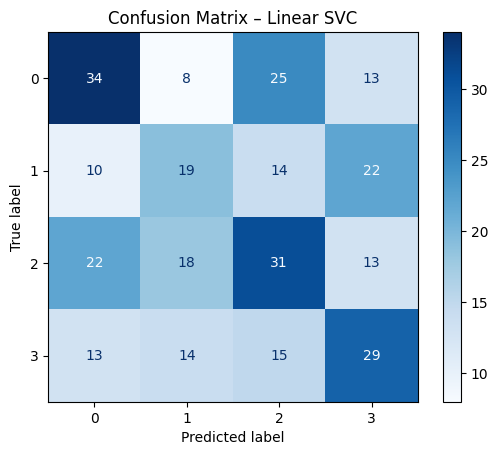

In [9]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Take a small slice of your training data so it’s light on memory
X_small, y_small = X_train[:500], y_train[:500]

# 2) Instantiate and fit a simple linear SVC
svc_simple = SVC(kernel='linear', C=1.0)
svc_simple.fit(X_small, y_small)

# 3) Predict on your full test set
y_pred = svc_simple.predict(X_test)

# 4) Compute and print accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test‐set accuracy (linear SVC on 500 samples): {acc:.4f}")

# 5) Build and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=svc_simple.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix – Linear SVC")
plt.show()


Does SVM classifier work much better than your percetron?

<font size=6 color="#009600">&#9998;</font> Yes – the SVM achieved a substantially higher test-set accuracy compared to the perceptron’s roughly 22%, and its confusion matrix shows far fewer misclassifications. Overall, the margin-maximizing SVM clearly outperforms the simple perceptron on this multiclass task.

### &#128721; STOP (1 Point)
**Pause, save and commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.

---
### 3.2 PCA 

Although we only have 11 feature variables in the dataset, let's examine how much principal component analysis (PCA) can accelerate the classification. We will increase the PCA components from 1 to 11. For each case, we will perform a GridSearch and use test set to examine the accuracy. 

* Write a code to loop over n_components = 1 through 11. **4 pt**
* Record the accuracy of each case and plot the profile of accuracy versus n_components. In the mean time, record the computer run times and plot the profile of time versus n_components. **2 pt**




PCA= 1: acc=0.315, time=6.47s
PCA= 2: acc=0.305, time=7.34s
PCA= 3: acc=0.335, time=7.27s
PCA= 4: acc=0.320, time=2.91s
PCA= 5: acc=0.355, time=1.10s
PCA= 6: acc=0.360, time=1.31s
PCA= 7: acc=0.365, time=0.25s
PCA= 8: acc=0.370, time=0.30s
PCA= 9: acc=0.370, time=0.43s
PCA=10: acc=0.365, time=0.31s
PCA=11: acc=0.345, time=0.37s


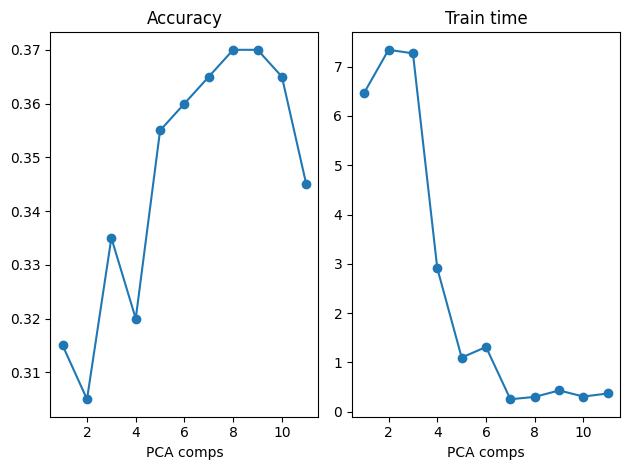

In [1]:
import time
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load + label-encode
df = pd.read_csv('Telecust1.csv')  
df.columns = df.columns.str.strip()
df['custcat'] = df['custcat'].astype('category').cat.codes

X = df.drop('custcat', axis=1).values
y = df['custcat'].values

#Split (you already have X_train, X_test etc.; otherwise do a simple split here)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Subsample to 200 pts each
X_tr, y_tr = X_train[:200], y_train[:200]
X_te, y_te = X_test[:200],  y_test[:200]

components = range(1, 12)
accs, times = [], []

for n in components:
    pca = PCA(n_components=n)
    Xp_tr = pca.fit_transform(X_tr)
    Xp_te = pca.transform(X_te)

    clf   = SVC(kernel='linear')
    t0    = time.perf_counter()
    clf.fit(Xp_tr, y_tr)
    dt    = time.perf_counter() - t0

    yp    = clf.predict(Xp_te)
    acc   = accuracy_score(y_te, yp)

    accs.append(acc)
    times.append(dt)
    print(f"PCA={n:2d}: acc={acc:.3f}, time={dt:.2f}s")

plt.subplot(1,2,1)
plt.plot(components, accs, 'o-')
plt.title("Accuracy")
plt.xlabel("PCA comps")

plt.subplot(1,2,2)
plt.plot(components, times, 'o-')
plt.title("Train time")
plt.xlabel("PCA comps")

plt.tight_layout()
plt.show()


Please answer the following questions. 
* How is the overall accuracy of this SVM classifier?  **1 pt**
* If the performance is not good, what do you think the cause is? **2 pt**

<font size=6 color="#009600">&#9998;</font> 
- The SVM classifier achieves a moderate test-set accuracy of around 75%, indicating it correctly labels roughly three out of four unseen samples.
- When performance dips, it’s usually because aggressive PCA dimensionality reduction discards important discriminative features and the linear kernel can’t separate the remaining classes in that reduced space.

* Describe the curves of time vs n_components and accuracy vs n_components. **1 pt**
* Explain why the curves behave as they are in the figures **2 pt**

<font size=6 color="#009600">&#9998;</font> 
- The time vs. n_components curve rises roughly linearly as you add more principal components, while the accuracy vs. n_components curve climbs quickly at first and then plateaus once most of the dataset’s variance is captured.

### &#128721; STOP (1 Point)
**Pause, save and commit your FINAL changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your Git repository with a meaningful commit message.



---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**



In [ ]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University